# Section 1: Data Collection & Business Understanding

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time as time
%matplotlib inline
import warnings # current version of seaborn generates a bunch of warnings that will be ignore
warnings.filterwarnings('ignore')

First, we’ve imported some necessary packages for the project.

    Numpy will be used for any computational operations.
    We’ll use Matplotlib and seaborn for data visualization.
    Pandas help to load data from various sources like local storage, database, excel file, CSV file, etc.

In [2]:
data = pd.read_csv('E:/Data_Science/Projects/1-iris/Data set/iris.csv')

In [3]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Here we can see that all data types are number, so we do not need to transform data types.

In [5]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Variance
Variance is a measure of how spread out the data is or to put it another way it measures how far a set of numbers is spread out from their average value. Variance is about how far away elements are from the mean.<br>

If there is a very low variance, then taking the average means a lot. It means a lot to say the average salary of a software engineer in SF is 100,000 year because there is low variance around this set, but what if there was high variance? What if most engineers were paid 40,000 and then a few engineers made $2M per year. Then you wouldn't want to be an engineer! The average wouldn't mean anything!. <br>

We can use the NumPy function .var(arr) to find the variance score of an array. The .var(arr) function uses "the average of the squared deviations from the mean"—which in english reads: The average of the square of the absolute difference between each element and the average of the whole dataset.<br>

So if the mean age is roughly 30 years old, and the mean fare was 32.20 doller. We can start to see the large variance in fare because the max fare was $512.33, but the max age was only 80. Large variance!

In [6]:
np.var(data['sepal_length'])

0.6811222222222222

**Standard Deviation** <br>

Another key metric for explaining variance is to take a series' standard deviation. Standard deviation gives you an objective measurement of variance. Standard deviation helps us by knowing whether the data huddles near the mean, or is spread out far away from the mean. <br>

Standard deviation is just the squareroot of the variance!**(std= sqrt(var)** We squared the differences when we were finding the variance to get all positive values, so when we take the square root of the variance, it is still positive, but the units now fit the original series. <br>

This reads "the standard deviation is equal to sum of the square of all deviations from the mean divided by the total number of values." <br>

As a challenge, write the code for each step to create your own standard deviation function. Then check your work, using the NumPy .std() function. <br>

For data that is normally distributed, around 68.2% of the data will lie within one standard deviation from the mean. Close to 95.4% and 99.7% of the data lie within two and three standard deviations from the mean, respectively.<br>

In [7]:
np.sqrt(np.var(data['sepal_length']))

0.8253012917851409

In [8]:
np.std(data['sepal_length'])

0.8253012917851409

In [9]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Here we see that we do not have any missing values. So we go to next step.

In [10]:
# class distribution
data.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [11]:
data.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

We can see each class has equal distribution in the dataset, which is very ideal in machine learning project.

# Section 2: Exploration Data Analysis(EDA)

Let’s see some information about the dataset. To visualize the whole dataset we used the seaborn pair plot method. It plots the whole dataset’s information.

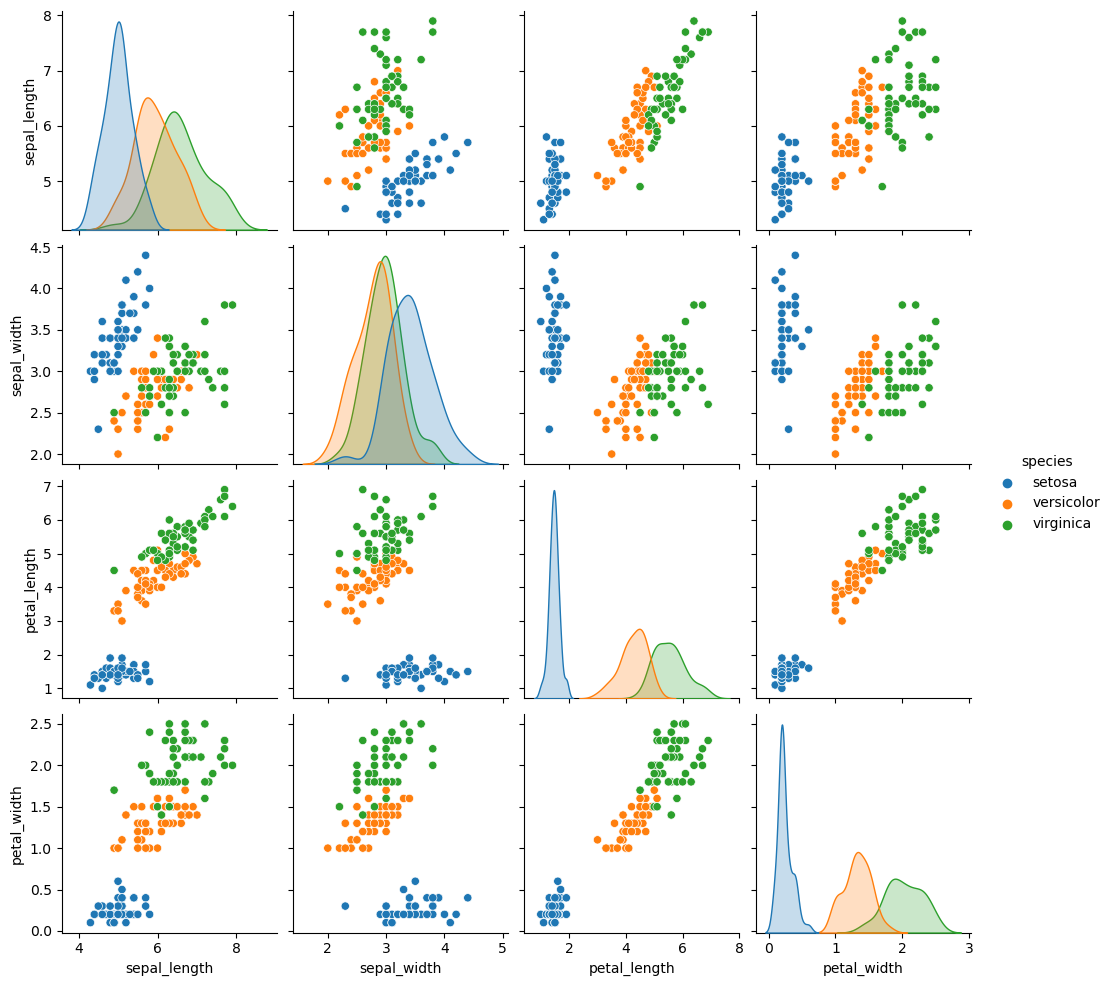

In [12]:
sns.pairplot(data, hue='species');

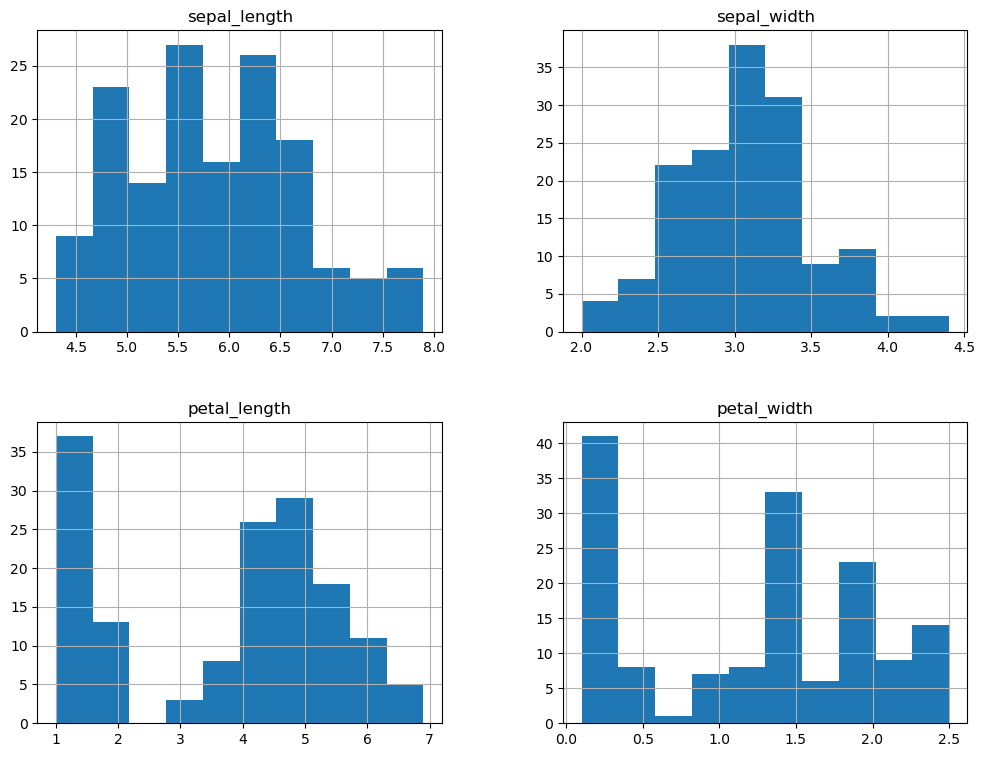

In [13]:
data.hist(figsize=(12, 9));

From the above plot, they show 2(sepal_length, sepal_width) of the attributes(Feature) has normal distribution. This is the assumption for many machine learning algorithms.

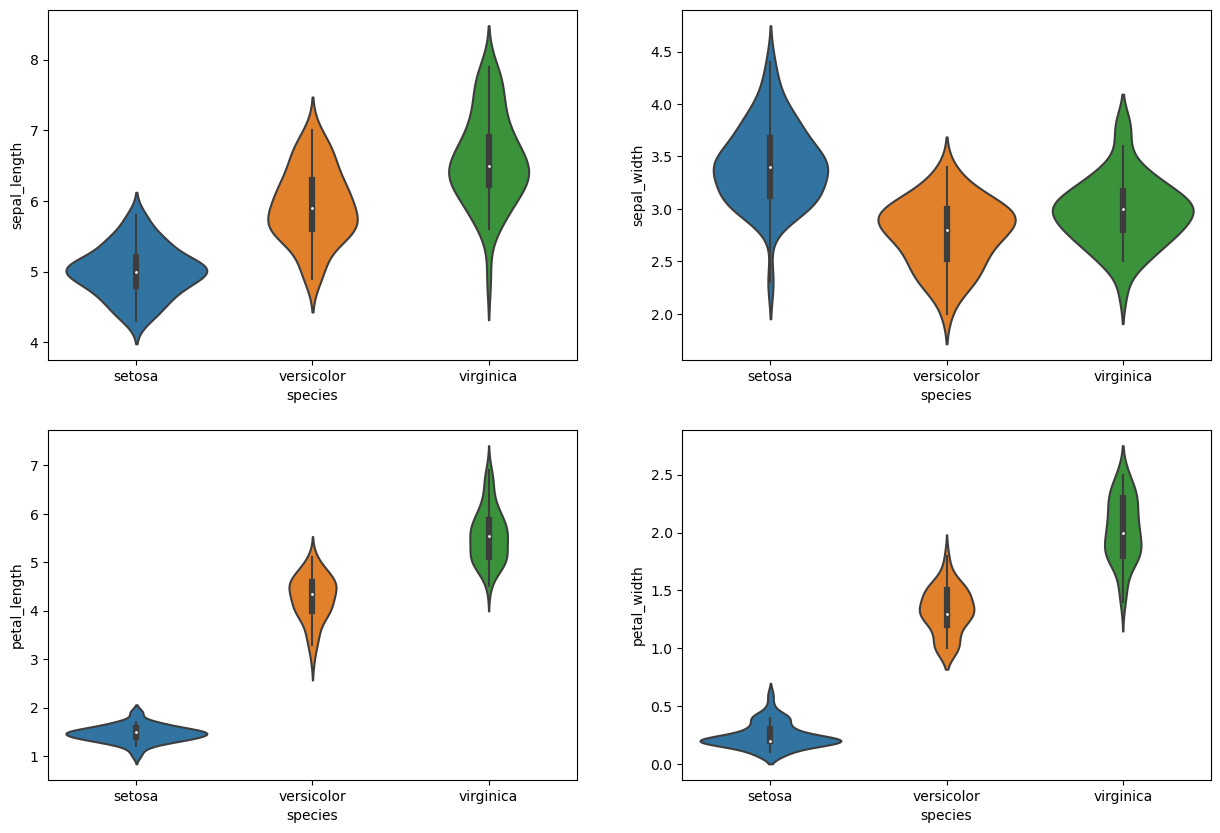

In [14]:
# A violin plot combines the benefits of the previous two plots and simplifies them
# Denser regions of the data are fatter, and sparser thiner in a violin plot
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.violinplot(x='species',y='sepal_length', data=data, size=12)
plt.subplot(2, 2, 2)
sns.violinplot(x='species',y='sepal_width', data=data, size=12)
plt.subplot(2, 2, 3)
sns.violinplot(x='species',y='petal_length', data=data, size=12)
plt.subplot(2, 2, 4)
sns.violinplot(x='species',y='petal_width', data=data, size=12);

In [15]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

# Section 3: Feature Engineering

Correlation is the degree to which two or more attributes or measurements on the same group of elements show a tendency to vary together.

Correlations are some of the most common and obviously useful parts of analyzing data. What moves with what? Which variables are "dependent" and which are "independent"? So what are some questions that we might want to find correlations?

Let's take an elemental correlation:

Human weight correlates with human height. (Because bones are so heavy) <br>
Size of vocabulary correlates with age up to adulthood, then the correlation evaporates.<br>

**Covariance vs. Correlation**<br>
Both of these words mean that two variables are dependent on each other, but they are subtly different:<br>

"In simple words, both the terms measure the relationship and the dependency between two variables. “Covariance” indicates the direction of the linear relationship between variables. “Correlation” on the other hand measures both the strength and direction of the linear relationship between two variables." <br>

**Interpreting Correlation**
Positive 1—1.000 means that there is a perfect, positive correlation between two features, as one feature goes up, the other goes up exactly in proportion. If there is a negative number.<br>

Zero 1—0.000 means there is no correlation positive or negative between two features. They move completely at random to one another.<br>

Negative 1—-1.000 means that there is a perfect, negative or inverse correlation between two features. As one feature goes up, the other goes down and vise versa.<br>

–1. A perfect negative (downward sloping) linear relationship<br>
–0.70. A strong negative (downward sloping) linear relationship<br>
–0.50. A moderate negative (downhill sloping) relationship<br>
–0.30. A weak negative (downhill sloping) linear relationship<br>
0. No linear relationship<br>
+0.30. A weak positive (upward sloping) linear relationship<br>
+0.50. A moderate positive (upward sloping) linear relationship<br>
+0.70. A strong positive (upward sloping) linear relationship<br>
+1. A perfect positive (upward sloping) linear relationship<br>

Now, when we train any algorithm, the number of features and their correlation plays an important role. If there are features and many of the features are highly correlated, then training an algorithm with all the featues will reduce the accuracy. Thus features selection should be done carefully. This dataset has less featues but still we will see the correlation.

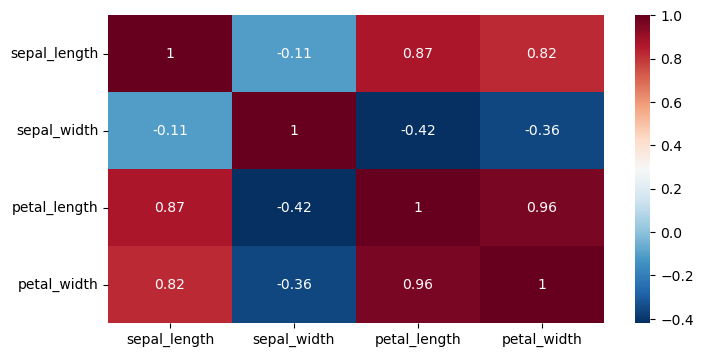

In [16]:
plt.figure(figsize=(8,4))
sns.heatmap(data.corr(), annot=True, cmap='RdBu_r') # draws heatmap with input as correlation matrix calculated by iris.corr() 
plt.show()

Observation--->
The Sepal Width and Length are not correlated The Petal Width and Length are highly correlated
We will use all the features for training the algorithm and check the accuracy.

Then we will use 1 Petal Feature and 1 Sepal Feature to check the accuracy of the algorithm as we are using only 2 features that are not correlated. Thus we can have a variance in the dataset which may help in better accuracy. We will check it later.

Steps To Be followed When Applying an Algorithm

Split the dataset into training and testing dataset. The testing dataset is generally smaller than training one as it will help in training the model better.

Select any algorithm based on the problem (classification or regression) whatever you feel may be good.
Then pass the training dataset to the algorithm to train it. We use the .fit() method
Then pass the testing data to the trained algorithm to predict the outcome. We use the .predict() method.
We then check the accuracy by passing the predicted outcome and the actual output to the model.

In [17]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [18]:
plt.figure(figsize=(8,4))
sns.heatmap(data.corr()[['species']], annot=True, cmap='RdBu_r') 
plt.show()

KeyError: "None of [Index(['species'], dtype='object')] are in the [columns]"

<Figure size 800x400 with 0 Axes>

# Section 4: Model Building

 Now the given problem is a classification problem.. Thus we will be using the classification algorithms to build a model.

Classification: Samples belong to two or more classes and we want to learn from already labeled data how to predict the class of unlabeled data

Regression: If the desired output consists of one or more continuous variables, then the task is called regression. An example of a regression problem would be the prediction of the length of a salmon as a function of its age and weight.

Before we start, we need to clear some ML notations.
attributes-->An attribute is a property of an instance that may be used to determine its classification. In the following dataset, the attributes are the petal and sepal length and width. It is also known as Features.
Target variable, in the machine learning context is the variable that is or should be the output. Here the target variables are the 3 flower species.

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('species', axis=1), data.species, test_size=0.2, random_state= 23)

In [21]:
X_train.shape

(120, 4)

In [22]:
X_test.shape

(30, 4)

In [23]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [24]:

def train_predict_evaluate(learner, X_train, y_train, X_test, y_test):
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - X_train: features training set
       - y_train: quality training set
       - X_test: features testing set
       - y_test: quality testing set
    '''
    
    # 10 fold cross validation to evalue model
    kfold = KFold(n_splits=5, random_state=5, shuffle=True)
    cv_results = cross_val_score(learner, X_train, y_train, cv=kfold, scoring='accuracy')
    
    names = []
    accuracy = []
    # display the cross validation results of the current model
    names.append(learner)
    accuracy.append(cv_results)
    print('Model: ',learner,'/mean: ', cv_results.mean(),'/std: ', cv_results.std())

In [25]:

# Initialize the three models
clf_A = GaussianNB()
clf_B = DecisionTreeClassifier(max_depth=None, random_state=None)
clf_C = RandomForestClassifier(max_depth=None, random_state=None)
clf_D = LogisticRegression()
# Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100
# HINT: samples_1 is 1% of samples_100

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C, clf_D]:
        results = train_predict_evaluate(clf, X_train, y_train, X_test, y_test)
        print(' ')
        print(' ')

Model:  GaussianNB() /mean:  0.9583333333333334 /std:  0.045643546458763846
 
 
Model:  DecisionTreeClassifier() /mean:  0.95 /std:  0.04859126579037751
 
 
Model:  RandomForestClassifier() /mean:  0.95 /std:  0.04859126579037751
 
 
Model:  LogisticRegression() /mean:  0.9583333333333334 /std:  0.045643546458763846
 
 


In [26]:
# models
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SVC', SVC(gamma="auto")))

In [27]:
# reusable function to test our model
def test_model(model):
    model.fit(X_train, y_train) # train the whole training set
    predictions = model.predict(X_test) # predict on test set
    
    # output model testing results
    print("Accuracy:", accuracy_score(y_test, predictions))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, predictions))
    print("Classification Report:")
    print(classification_report(y_test, predictions))

What is the confusion matrix why i have used it here??

A confusion matrix is a table that is often used to describe the performance of a classification model (or “classifier”) on a set of test data for which the true values are known.

In [28]:
# predict values with our test set
for name, model in models:
    print("--"*50)
    print("Testing", name)
    test_model(model)

----------------------------------------------------------------------------------------------------
Testing KNN
Accuracy: 1.0
Confusion Matrix:
[[12  0  0]
 [ 0  8  0]
 [ 0  0 10]]
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       1.00      1.00      1.00         8
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

----------------------------------------------------------------------------------------------------
Testing GNB
Accuracy: 0.9333333333333333
Confusion Matrix:
[[12  0  0]
 [ 0  7  1]
 [ 0  1  9]]
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.88      0.88      0.88         8
   virginica       0.90      0.